In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\data science\Final bihga\KDD\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20", 
                                  20: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20',"Label"] 

csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\data science\Final bihga\KDD\with attention and dimensionality reduction\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20", 
                                  20: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20',"Label"] 
  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

       Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0      0.051485  0.050637  0.049686  0.049686  0.049686  0.050005  0.049686   
1      0.049191  0.049191  0.049191  0.049191  0.049191  0.049191  0.049191   
2      0.051593  0.049907  0.049728  0.049728  0.049728  0.050205  0.049728   
3      0.049399  0.052848  0.049399  0.049399  0.049492  0.049399  0.049399   
4      0.051491  0.052634  0.049573  0.049573  0.049573  0.050105  0.049573   
...         ...       ...       ...       ...       ...       ...       ...   
39993  0.049813  0.049813  0.049813  0.049813  0.049813  0.049813  0.049813   
39994  0.048809  0.048809  0.048809  0.048809  0.048809  0.054873  0.048809   
39995  0.048809  0.048809  0.048809  0.048809  0.048809  0.054873  0.048809   
39996  0.049604  0.049604  0.049604  0.049604  0.049604  0.049604  0.049604   
39997  0.049816  0.049816  0.049816  0.049816  0.049816  0.049816  0.049816   

       Feature8  Feature9  Feature10  ...  Feature1

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

55997 Training sequences (55997, 20)
23999 Validation sequences (23999, 20)
55997 Training sequences (55997,)


In [8]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                252       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [11]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
6000/6000 [==============================] - 5s 794us/step - loss: 0.0895 - accuracy: 0.9791 - val_loss: 0.1172 - val_accuracy: 0.9784
Epoch 2/20
6000/6000 [==============================] - 5s 820us/step - loss: 0.0895 - accuracy: 0.9788 - val_loss: 0.0908 - val_accuracy: 0.9845
Epoch 3/20
6000/6000 [==============================] - 5s 818us/step - loss: 0.0889 - accuracy: 0.9795 - val_loss: 0.0787 - val_accuracy: 0.9828
Epoch 4/20
6000/6000 [==============================] - 5s 829us/step - loss: 0.0870 - accuracy: 0.9801 - val_loss: 0.1017 - val_accuracy: 0.9841
Epoch 5/20
6000/6000 [==============================] - 5s 779us/step - loss: 0.0878 - accuracy: 0.9804 - val_loss: 0.0817 - val_accuracy: 0.9859
Epoch 6/20
6000/6000 [==============================] - 5s 797us/step - loss: 0.0883 - accuracy: 0.9801 - val_loss: 0.0823 - val_accuracy: 0.9857
Epoch 7/20
6000/6000 [==============================] - 5s 825us/step - loss: 0.0860 - accuracy: 0.9807 - val_loss: 0.1018 -

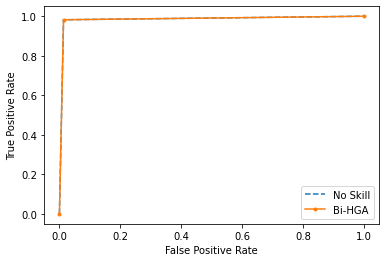

[0 0 0 ... 1 1 1]


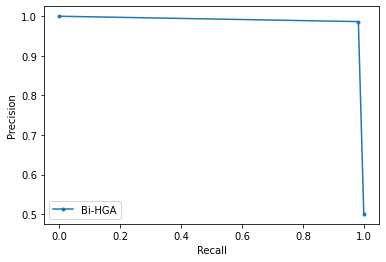

Epoch 1/20
6000/6000 [==============================] - 5s 783us/step - loss: 0.0853 - accuracy: 0.9815 - val_loss: 0.0697 - val_accuracy: 0.9854
Epoch 2/20
6000/6000 [==============================] - 5s 817us/step - loss: 0.0845 - accuracy: 0.9825 - val_loss: 0.1042 - val_accuracy: 0.9748
Epoch 3/20
6000/6000 [==============================] - 5s 811us/step - loss: 0.0858 - accuracy: 0.9817 - val_loss: 0.0733 - val_accuracy: 0.9823
Epoch 4/20
6000/6000 [==============================] - 5s 820us/step - loss: 0.0844 - accuracy: 0.9820 - val_loss: 0.0731 - val_accuracy: 0.9871
Epoch 5/20
6000/6000 [==============================] - 5s 808us/step - loss: 0.0849 - accuracy: 0.9821 - val_loss: 0.0794 - val_accuracy: 0.9870
Epoch 6/20
6000/6000 [==============================] - 5s 832us/step - loss: 0.0845 - accuracy: 0.9817 - val_loss: 0.0738 - val_accuracy: 0.9833
Epoch 7/20
6000/6000 [==============================] - 5s 828us/step - loss: 0.0831 - accuracy: 0.9822 - val_loss: 0.0671 -

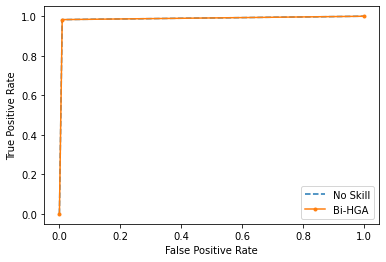

[0 0 0 ... 1 1 1]


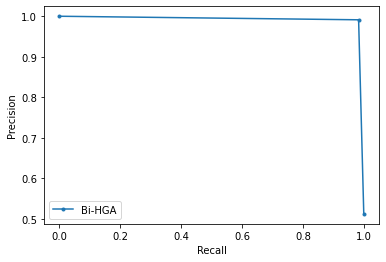

Epoch 1/20
6000/6000 [==============================] - 5s 798us/step - loss: 0.0794 - accuracy: 0.9830 - val_loss: 0.0682 - val_accuracy: 0.9847
Epoch 2/20
6000/6000 [==============================] - 5s 823us/step - loss: 0.0786 - accuracy: 0.9831 - val_loss: 0.0611 - val_accuracy: 0.9878
Epoch 3/20
6000/6000 [==============================] - 5s 828us/step - loss: 0.0788 - accuracy: 0.9825 - val_loss: 0.0627 - val_accuracy: 0.9874
Epoch 4/20
6000/6000 [==============================] - 5s 797us/step - loss: 0.0783 - accuracy: 0.9829 - val_loss: 0.0978 - val_accuracy: 0.9796
Epoch 5/20
6000/6000 [==============================] - 5s 813us/step - loss: 0.0791 - accuracy: 0.9830 - val_loss: 0.0625 - val_accuracy: 0.9887
Epoch 6/20
6000/6000 [==============================] - 5s 807us/step - loss: 0.0777 - accuracy: 0.9833 - val_loss: 0.0697 - val_accuracy: 0.9851
Epoch 7/20
6000/6000 [==============================] - 5s 814us/step - loss: 0.0779 - accuracy: 0.9832 - val_loss: 0.0827 -

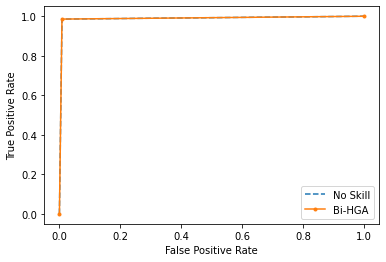

[0 0 0 ... 1 1 1]


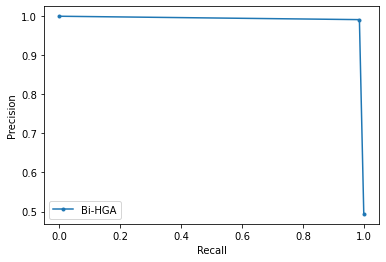

Epoch 1/20
6000/6000 [==============================] - 5s 804us/step - loss: 0.0703 - accuracy: 0.9840 - val_loss: 0.0579 - val_accuracy: 0.9871
Epoch 2/20
6000/6000 [==============================] - 5s 828us/step - loss: 0.0698 - accuracy: 0.9842 - val_loss: 0.0575 - val_accuracy: 0.9869
Epoch 3/20
6000/6000 [==============================] - 5s 819us/step - loss: 0.0681 - accuracy: 0.9846 - val_loss: 0.0563 - val_accuracy: 0.9873
Epoch 4/20
6000/6000 [==============================] - 5s 820us/step - loss: 0.0690 - accuracy: 0.9837 - val_loss: 0.0796 - val_accuracy: 0.9804
Epoch 5/20
6000/6000 [==============================] - 5s 826us/step - loss: 0.0679 - accuracy: 0.9845 - val_loss: 0.0719 - val_accuracy: 0.9804
Epoch 6/20
6000/6000 [==============================] - 5s 816us/step - loss: 0.0678 - accuracy: 0.9840 - val_loss: 0.0579 - val_accuracy: 0.9874
Epoch 7/20
6000/6000 [==============================] - 5s 825us/step - loss: 0.0662 - accuracy: 0.9845 - val_loss: 0.0539 -

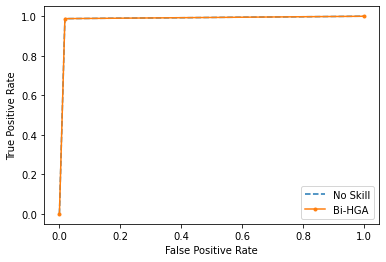

[0 0 0 ... 1 1 1]


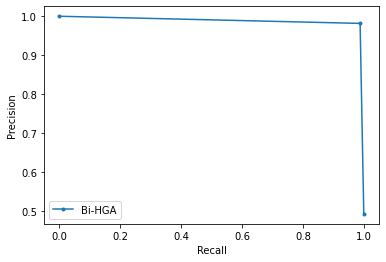

Cross Validation ROC - AUC = 0.9862239196287567
Cross Validation Precision recall curve - AUC = 0.9802234235172285
Cross Validation accuracy = 0.9861993099654982
Cross Validation f1 = 0.9861783950093965
Cross Validation precision = 0.987678482058212
Cross Validation recall = 0.9846982815241048
Cross Validation fpr = [0.         0.01225044 1.        ]
Cross Validation tpr = [0.         0.98469828 1.        ]
Cross Validation lr_precision = [0.5        0.98767848 1.        ]
Cross Validation lr_recall = [1.         0.98469828 0.        ]


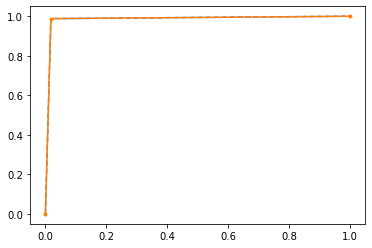

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from importlib import reload
reload(plt)
#from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
aucs1=0
f1s=0
recalls=0
precisions=0
accuracys=0
lr_precisions=0
lr_recalls=0
fprs=0
tprs=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    model = CatBoostClassifier(
        iterations = 2,
        depth = 1,
        verbose = 10
    )
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    predictions = [round(x[0]) for x in predictions]
    
   
    # make class predictions with the model
   # predictions1 =  model.predict>0.5.astype('int32')
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    #https://www.kaggle.com/vedbharti/classification-precision-recall-vs-roc-plot
    auc1=average_precision_score(y_val, predictions)
     
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, predictions)
    #lr_f1, lr_auc = f1_score(y_val, predictions1), auc(lr_recall, lr_precision)
    # summarize scores
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Bi-HGA')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    aucs += auc
    aucs1 += auc1
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fprs+=fpr
    tprs+=tpr
    lr_recalls+=lr_recall
    lr_precisions+=lr_precision
print("Cross Validation ROC - AUC = {}".format(aucs/4))
print("Cross Validation Precision recall curve - AUC = {}".format(aucs1/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fprs/4))
print("Cross Validation tpr = {}".format(tprs/4))
print("Cross Validation lr_precision = {}".format(lr_precisions/4))
print("Cross Validation lr_recall = {}".format(lr_recalls/4))

ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')


In [13]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 6m 49s
